In [2]:
library(CellChat)
library(tidyverse)
library(Seurat)

Loading required package: dplyr

Warning message:
“package ‘dplyr’ was built under R version 4.4.3”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: igraph




Attaching package: ‘igraph’


The following objects are masked from ‘package:dplyr’:

    as_data_frame, groups, union


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union


Loading required package: ggplot2

Warning message:
“package ‘tidyverse’ was built under R version 4.4.3”
Warning message:
“package ‘tibble’ was built under R version 4.4.3”
Warning message:
“package ‘readr’ was built under R version 4.4.3”
Warning message:
“package ‘forcats’ was built under R version 4.4.3”
Warning message:
“package ‘lubridate’ was built under R version 4.4.3”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.1     ✔ stringr   1.6.0
✔ lubridate 1.9.4     ✔ tibble    3.3.0
✔ purrr     1.2.0     ✔ tidyr     1.3.2
✔ readr     2.1.5     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ lubridate::%--%()        masks igraph::%--%

In [3]:
cellchat <- readRDS('/mnt/18T/chibao/gliomas/data/upstream/scRNA/official/integrated_v5_optimized/adult/cellchat/obj_cellchat_done.rds')
cellchat

An object of class CellChat created from a single dataset 
 36031 genes.
 346898 cells. 
CellChat analysis of single cell RNA-seq data! 

In [4]:
cellchat@netP$pathways

[1] "MIF"        "SPP1"       "PTN"        "CypA"       "MK"        
 [6] "ANNEXIN"    "GALECTIN"   "PSAP"       "COMPLEMENT" "GRN"       
[11] "VISFATIN"   "PARs"       "NRG"        "IL1"        "VEGF"      
[16] "EGF"        "PLAU"       "IGFBP"      "TGFb"       "TNF"       
[21] "ANGPTL"     "BAFF"       "SEMA3"      "ANGPT"      "FGF"       
[26] "CALCR"      "GAS"        "PDGF"       "EDN"        "PTPR"

In [5]:
options(repr.plot.width = 14, repr.plot.height = 10)

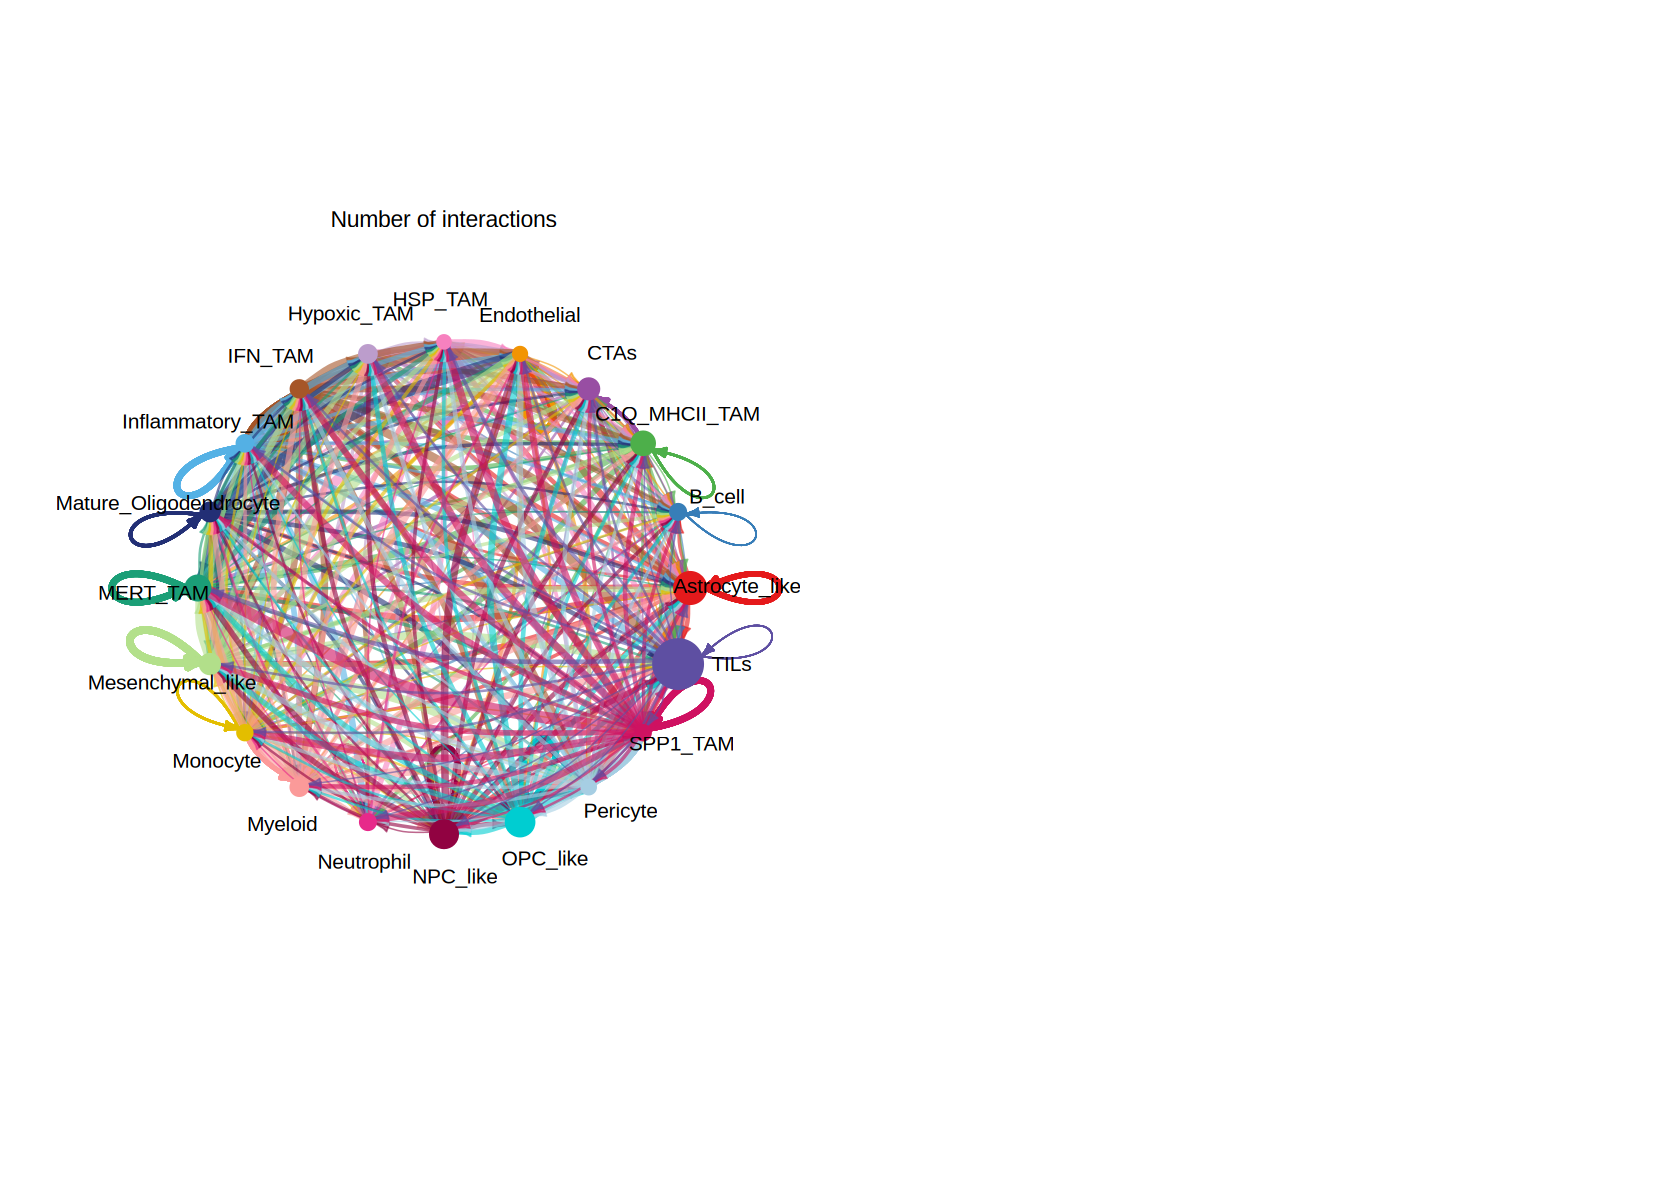

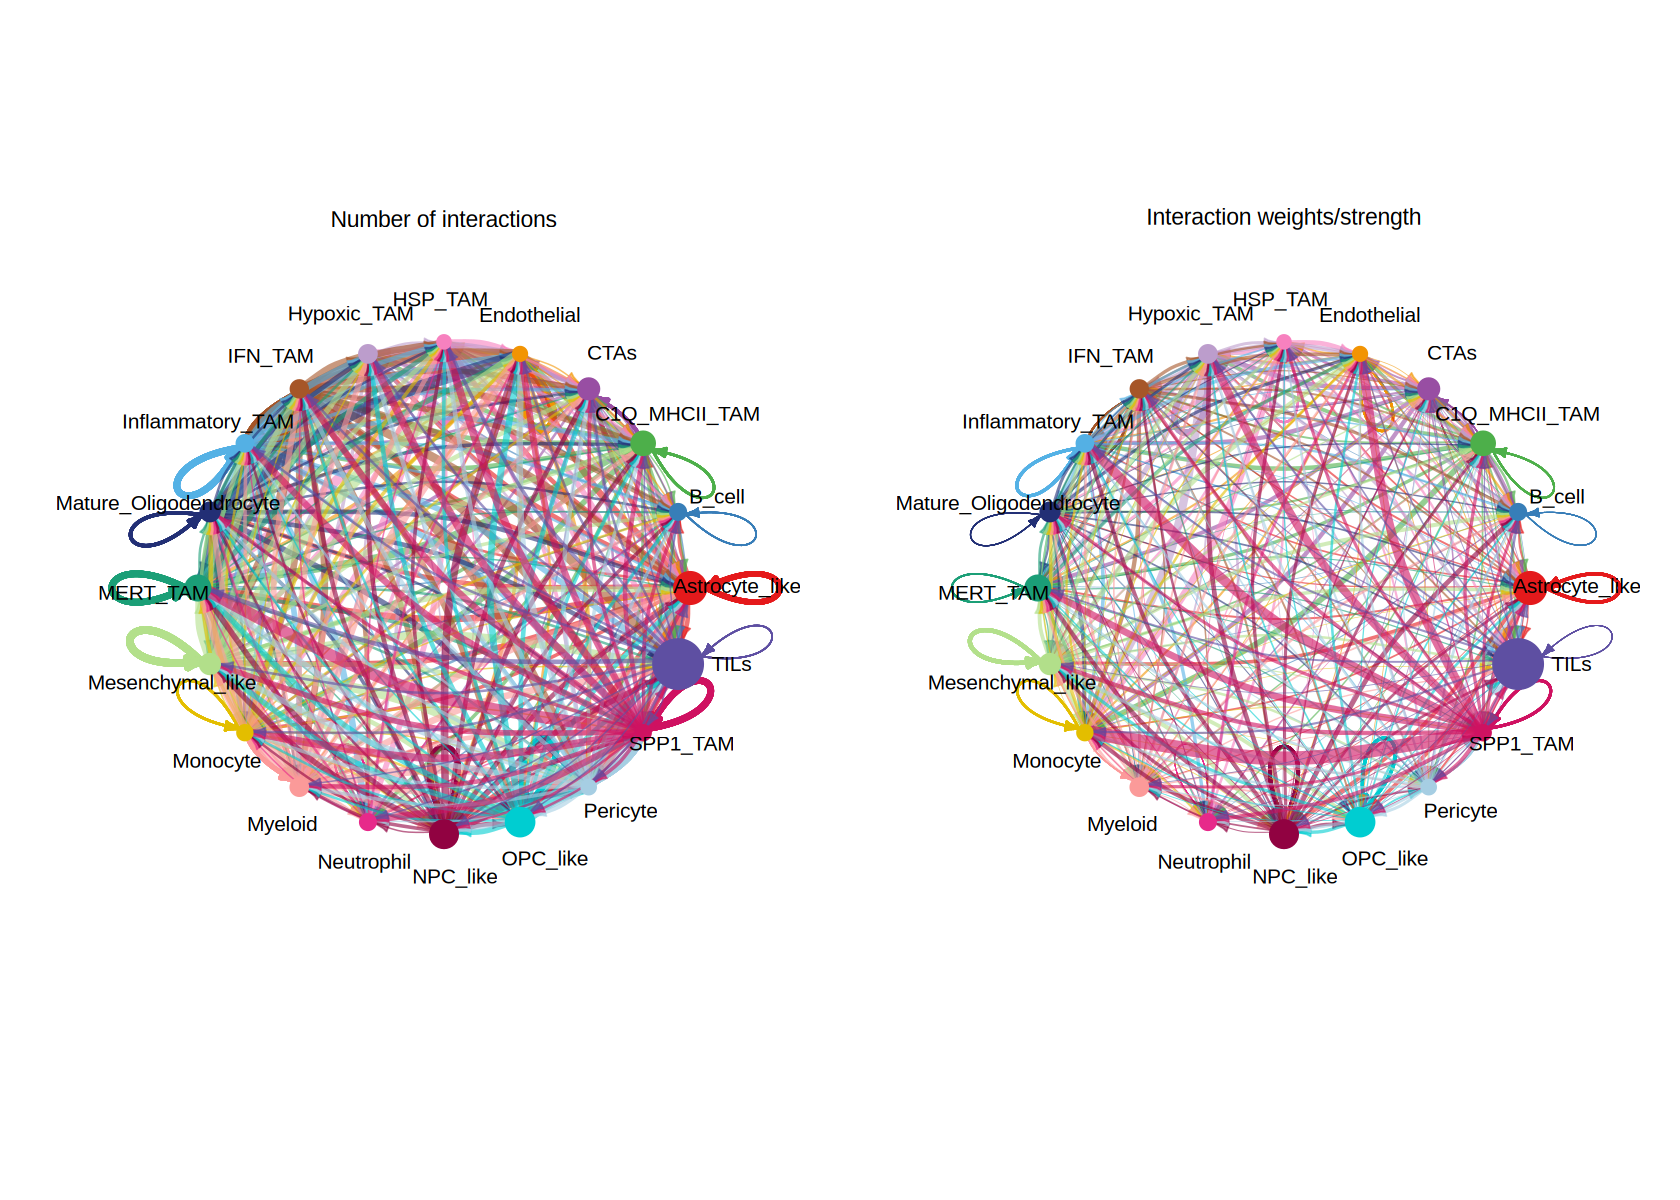

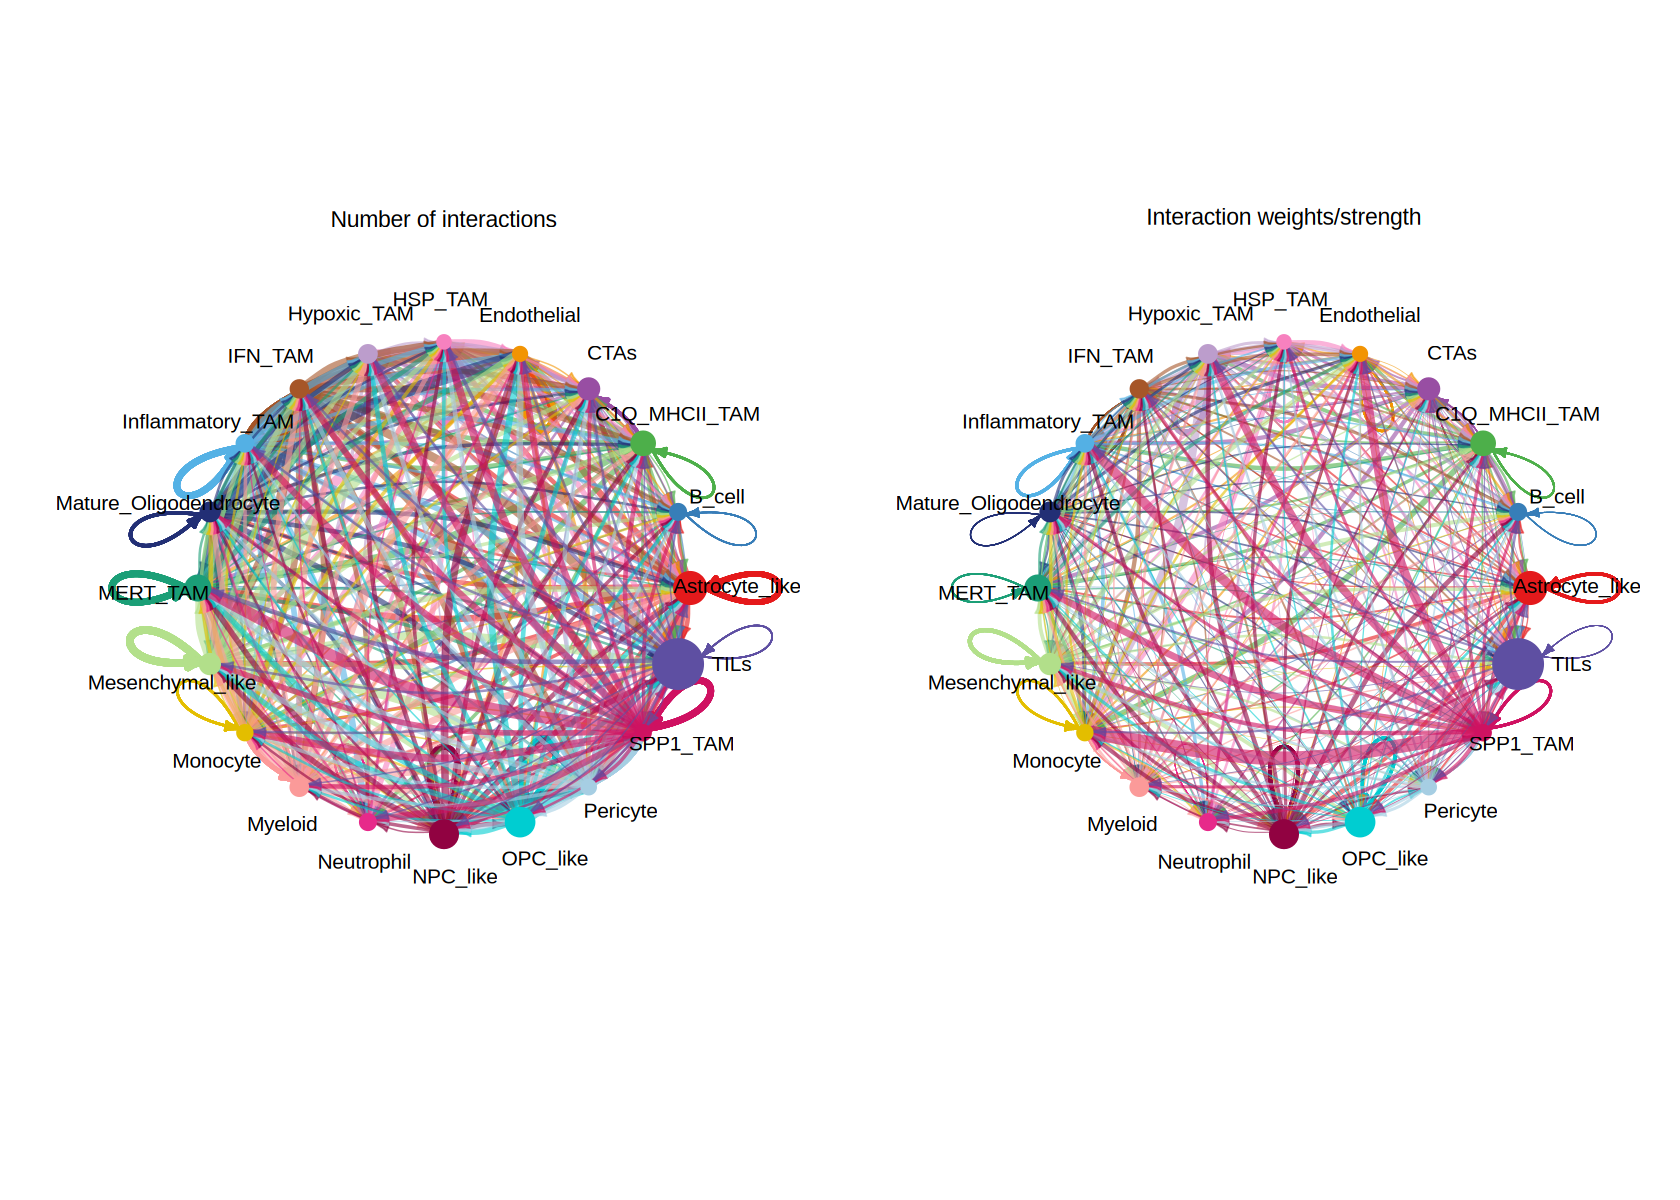

In [7]:
groupSize <- as.numeric(table(cellchat@idents)) # Contain identity label of cells 
par(mfrow = c(1,2), xpd=TRUE) # Display 1 row and 2 columns of plots side by side
netVisual_circle(cellchat@net$count, vertex.weight = groupSize, weight.scale = T, label.edge= F, title.name = "Number of interactions") 
netVisual_circle(cellchat@net$weight, vertex.weight = groupSize, weight.scale = T, label.edge= F, title.name = "Interaction weights/strength") 

In [9]:
df.net <- subsetCommunication(cellchat, slot.name = "netP")
df.net$pathway_name |> unique()

[1] "MK"         "NRG"        "PTN"        "MIF"        "CypA"      
 [6] "ANNEXIN"    "ANGPTL"     "SPP1"       "GRN"        "VISFATIN"  
[11] "COMPLEMENT" "PSAP"       "PARs"       "PLAU"       "ANGPT"     
[16] "IGFBP"      "PDGF"       "GAS"        "EDN"        "GALECTIN"  
[21] "TGFb"       "IL1"        "CALCR"      "BAFF"       "TNF"       
[26] "FGF"        "SEMA3"      "VEGF"       "EGF"        "PTPR"

In [10]:
spp1 <- df.net |> filter(pathway_name == "SPP1")
spp1 |> arrange(desc(prob)) |> head()

source      target           pathway_name prob       pval
1 SPP1_TAM    Monocyte         SPP1         0.16978590 0   
2 SPP1_TAM    Endothelial      SPP1         0.11810527 0   
3 SPP1_TAM    Inflammatory_TAM SPP1         0.11706340 0   
4 SPP1_TAM    Hypoxic_TAM      SPP1         0.09044449 0   
5 HSP_TAM     Monocyte         SPP1         0.07737639 0   
6 Hypoxic_TAM Monocyte         SPP1         0.07194375 0